In [44]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
! pip install openpyxl

In [45]:
# read excel file to pandas.DataFrame
excel_file = 'UN_MigrantStockTotal_2015.xlsx'

# names of sheets included in excel file
sheet_names = [f'Table {i}' for i in range(1, 7)]

# all data are stored in list
tables = []

# iterate sheets
for name in sheet_names:
    # the first 14 rows are irrelevant to the data concerned (set skiprows)
    # and the title of data cross the two rows (set header)
    df = pd.read_excel(excel_file, name, skiprows=14, header=[0, 1])

# merge the multi-index columns
    columns_stand = []
    for main_title, sub_title in df.columns:
# if the title use one line
        if isinstance(sub_title, str) and sub_title.startswith('Unnamed:'):
            columns_stand.append(main_title.replace('\n', ' '))
# if the title has its 'sub title'
        else:
            columns_stand.append(' '.join(map(str, [main_title, sub_title])))

    df.columns = columns_stand
    tables.append(df)

In [46]:
origin_max_columns = pd.get_option("display.max_columns")
pd.set_option('display.max_columns', None)

In [47]:
#Table 1 - International migrant stock at mid-year by sex and by major area, region, country or area
tables[0].head()

Sort order Major area, region, country or area of destination Notes  \
0           1                                              WORLD   NaN   
1           2                                  Developed regions   (b)   
2           3                                 Developing regions   (c)   
3           4                          Least developed countries   (d)   
4           5  Less developed regions excluding least develop...   NaN   

   Country code Type of data (a)  \
0           900              NaN   
1           901              NaN   
2           902              NaN   
3           941              NaN   
4           934              NaN   

  International migrant stock at mid-year (both sexes) 1990  \
0                                          152563212          
1                                           82378628          
2                                           70184584          
3                                           11075966          
4                                           59105261          

  International migrant stock at mid-year (both sexes) 1995  \
0                                          160801752          
1                                           92306854          
2                                           68494898          
3                                           11711703          
4                                           56778501          

  International migrant stock at mid-year (both sexes) 2000  \
0                                          172703309          
1                                          103375363          
2                                           69327946          
3                                           10077824          
4                                           59244124          

  International migrant stock at mid-year (both sexes) 2005  \
0                                          191269100          
1                                          117181109          
2                                           74087991          
3                                            9809634          
4                                           64272611          

   International migrant stock at mid-year (both sexes) 2010  \
0                                          221714243           
1                                          132560325           
2                                           89153918           
3                                           10018128           
4                                           79130668           

   International migrant stock at mid-year (both sexes) 2015  \
0                                          243700236           
1                                          140481955           
2                                          103218281           
3                                           11951316           
4                                           91262036           

  International migrant stock at mid-year (male) 1990  \
0                                           77747510    
1                                           40263397    
2                                           37484113    
3                                            5843107    
4                                           31641006    

  International migrant stock at mid-year (male) 1995  \
0                                           81737477    
1                                           45092799    
2                                           36644678    
3                                            6142712    
4                                           30501966    

  International migrant stock at mid-year (male) 2000  \
0                                           87884839    
1                                           50536796    
2                                           37348043    
3                                            5361902    
4                                           31986141    

  International migrant st

In [48]:
tables[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Sort order                                                 265 non-null    int64 
 1   Major area, region, country or area of destination         265 non-null    object
 2   Notes                                                      26 non-null     object
 3   Country code                                               265 non-null    int64 
 4   Type of data (a)                                           232 non-null    object
 5   International migrant stock at mid-year (both sexes) 1990  265 non-null    object
 6   International migrant stock at mid-year (both sexes) 1995  265 non-null    object
 7   International migrant stock at mid-year (both sexes) 2000  265 non-null    object
 8   International migran

In [49]:
for column in tables[0].iloc[:, 5:]:
    tables[0] = tables[0][pd.to_numeric(
        tables[0][column], errors='coerce').notnull()]

tables[0].iloc[:, 5:] = tables[0].iloc[:, 5:].astype('int64')

In [50]:
tables[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 264
Data columns (total 23 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Sort order                                                 261 non-null    int64 
 1   Major area, region, country or area of destination         261 non-null    object
 2   Notes                                                      26 non-null     object
 3   Country code                                               261 non-null    int64 
 4   Type of data (a)                                           228 non-null    object
 5   International migrant stock at mid-year (both sexes) 1990  261 non-null    int64 
 6   International migrant stock at mid-year (both sexes) 1995  261 non-null    int64 
 7   International migrant stock at mid-year (both sexes) 2000  261 non-null    int64 
 8   International migran

In [51]:
continents = ['Asia', 'Europe', 'Africa', 'Oceania',
              'Latin America and the Caribbean', 'Northern America']
columns_plot = [
    'Major area, region, country or area of destination',
    *[f'International migrant stock at mid-year (male) {year}' for year in range(1990, 2016, 5)],
    *[f'International migrant stock at mid-year (female) {year}' for year in range(1990, 2016, 5)],
]
data_plot = (tables[0][tables[0]['Major area, region, country or area of destination']
                       .isin(continents)][columns_plot]
             )
data_plot = data_plot.melt(id_vars=[columns_plot[0]], var_name='gender_year',
                           value_name='International migrant stock at mid-year')
data_plot.gender_year = data_plot.gender_year.str.replace(
    r'.*?(male|female).*?(\d+)', lambda x: ' '.join([x.group(1), x.group(2)]), regex=True)
data_plot[['Gender', 'Year']] = data_plot.gender_year.str.split(expand=True)
data_plot.columns = ['Region', 'gender_year', 'Migrant', 'Gender', 'Year']
data_plot

Region  gender_year   Migrant  Gender  Year
0                            Africa    male 1990   8279564    male  1990
1                              Asia    male 1990  26011875    male  1990
2                            Europe    male 1990  23946673    male  1990
3   Latin America and the Caribbean    male 1990   3597037    male  1990
4                  Northern America    male 1990  13497319    male  1990
..                              ...          ...       ...     ...   ...
67                             Asia  female 2015  31530709  female  2015
68                           Europe  female 2015  39873338  female  2015
69  Latin America and the Caribbean  female 2015   4650938  female  2015
70                 Northern America  female 2015  27902348  female  2015
71                          Oceania  female 2015   4101334  female  2015

[72 rows x 5 columns]

In [52]:
df1=data_plot
df1.drop(['gender_year'], axis=1)

Region   Migrant  Gender  Year
0                            Africa   8279564    male  1990
1                              Asia  26011875    male  1990
2                            Europe  23946673    male  1990
3   Latin America and the Caribbean   3597037    male  1990
4                  Northern America  13497319    male  1990
..                              ...       ...     ...   ...
67                             Asia  31530709  female  2015
68                           Europe  39873338  female  2015
69  Latin America and the Caribbean   4650938  female  2015
70                 Northern America  27902348  female  2015
71                          Oceania   4101334  female  2015

[72 rows x 4 columns]

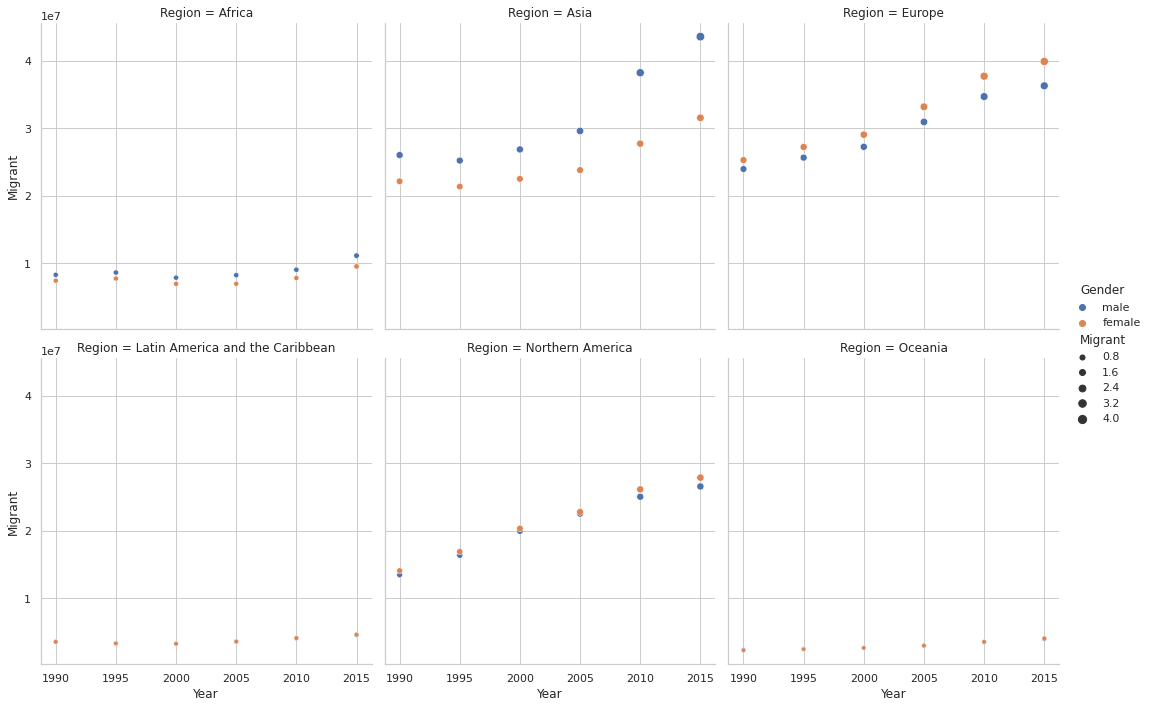

In [53]:
plot = sns.relplot(
    x='Year',
    y='Migrant',
    hue='Gender',
    col='Region',
    col_wrap=3,
    size='Migrant',
    data=data_plot,
)
plt.show()

In [54]:
#Table 2 - Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands)
for column in tables[1].iloc[:, 4:]:
    tables[1] = tables[1][pd.to_numeric(
        tables[1][column], errors='coerce').notnull()]

tables[1].iloc[:, 4:] = tables[1].iloc[:, 4:].astype('float64')

In [55]:
tables[1]

Sort order Major area, region, country or area of destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
251         252                   Micronesia (Federated States of)   NaN   
255         256                                          Polynesia   NaN   
258         259                                   French Polynesia   NaN   
260         261                                              Samoa   NaN   
262         263                                              Tonga   NaN   

     Country code  \
0             900   
1             901   
2             902   
3             941   
4             934   
..            ...   
251           583   
255           957   
258           258   
260           882   
262           776   

     Total population of both sexes at mid-year (thousands) 1990  \
0                                          5309667.699             
1                                          1144463.062             
2                                          4165204.637             
3                                           510057.629             
4                                          3655147.008             
..                                                 ...             
251                                             96.331             
255                                            547.869             
258                                            198.370             
260                                            162.865             
262                                             95.152             

     Total population of both sexes at mid-year (thousands) 1995  \
0                                          5735123.084             
1                                          1169761.211             
2                                          4565361.873             
3                                           585189.354             
4                                          3980172.519             
..                                                 ...             
251                                            107.556             
255                                            579.483             
258                                            215.200             
260                                            170.158             
262                                             95.889             

     Total population of both sexes at mid-year (thousands) 2000  \
0                                          6126622.121             
1                                          1188811.731             
2                                          4937810.390             
3                                           664386.087             
4                                          4273424.303             
..                                                 ...             
251                                            107.430             
255                                            612.495             
258                                            237.267             
260                                            174.614             
262                                             97.898             

     Total population of both sexes at mid-year (thousands) 2005  \
0                                          6519635.850             
1                                          1208919.509             
2                                          5310716.341             
3                                           752804.951             
4                                          45579

In [56]:
regions = [
    'WORLD', 'Asia', 'Europe', 'Africa', 'Oceania',
    'Latin America and the Caribbean', 'Northern America'
]
columns_plot = [
    'Major area, region, country or area of destination',
    *[f'Total male population at mid-year (thousands) {y}' for y in range(1990, 2016, 5)],
    *[f'Total female population at mid-year (thousands) {y}' for y in range(1990, 2016, 5)],
]
data_plot = (
    tables[1][tables[1]['Major area, region, country or area of destination']
              .isin(continents)][columns_plot]
)
data_plot = data_plot.melt(id_vars=[columns_plot[0]], var_name='gender_year',
                           value_name='Population')
data_plot.gender_year = data_plot.gender_year.str.replace(
    r'.*?(male|female).*?(\d+)', lambda x: ' '.join([x.group(1), x.group(2)]), regex=True)
data_plot[['Gender', 'Year']] = data_plot.gender_year.str.split(expand=True)
data_plot

Major area, region, country or area of destination  gender_year  \
0                                              Africa    male 1990   
1                                                Asia    male 1990   
2                                              Europe    male 1990   
3                     Latin America and the Caribbean    male 1990   
4                                    Northern America    male 1990   
..                                                ...          ...   
67                                               Asia  female 2015   
68                                             Europe  female 2015   
69                    Latin America and the Caribbean  female 2015   
70                                   Northern America  female 2015   
71                                            Oceania  female 2015   

     Population  Gender  Year  
0    315071.378    male  1990  
1   1634734.677    male  1990  
2    347356.281    male  1990  
3    221989.776    male  1990  
4    137757.875    male  1990  
..          ...     ...   ...  
67  2146310.075  female  2015  
68   382275.191  female  2015  
69   320877.844  female  2015  
70   180455.403  female  2015  
71    19624.181  female  2015  

[72 rows x 5 columns]

In [57]:
df2=data_plot
df2.drop(['gender_year'], axis=1)

Major area, region, country or area of destination   Population  Gender  \
0                                              Africa   315071.378    male   
1                                                Asia  1634734.677    male   
2                                              Europe   347356.281    male   
3                     Latin America and the Caribbean   221989.776    male   
4                                    Northern America   137757.875    male   
..                                                ...          ...     ...   
67                                               Asia  2146310.075  female   
68                                             Europe   382275.191  female   
69                    Latin America and the Caribbean   320877.844  female   
70                                   Northern America   180455.403  female   
71                                            Oceania    19624.181  female   

    Year  
0   1990  
1   1990  
2   1990  
3   1990  
4   1990  
..   ...  
67  2015  
68  2015  
69  2015  
70  2015  
71  2015  

[72 rows x 4 columns]

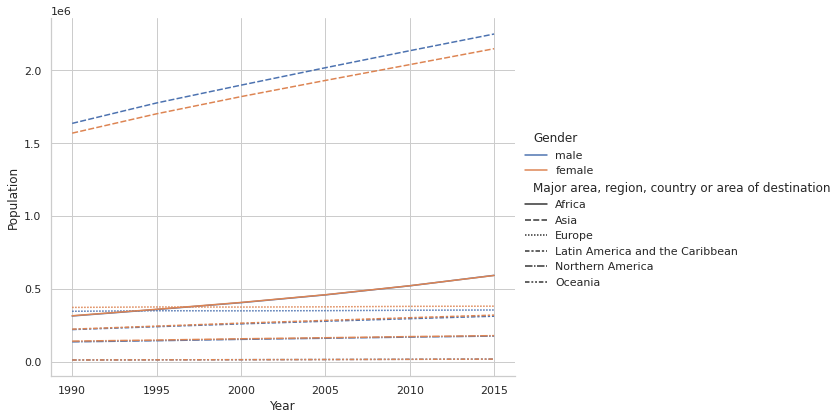

In [58]:
sns.relplot(
    x="Year", y="Population",
    hue="Gender", style='Major area, region, country or area of destination',
    kind="line", data=data_plot,
    height=6, aspect=1.3
)
plt.show()

In [59]:
#Table 3 - International migrant stock as a percentage of the total population, 1990-2015
for column in tables[2].iloc[:, 5:]:
    tables[2] = tables[2][pd.to_numeric(
        tables[2][column], errors='coerce').notnull()]

tables[2].iloc[:, 5:] = tables[2].iloc[:, 5:].astype('float64')

In [60]:
tables[2]

Sort order Major area, region, country or area of destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
251         252                   Micronesia (Federated States of)   NaN   
255         256                                          Polynesia   NaN   
258         259                                   French Polynesia   NaN   
260         261                                              Samoa   NaN   
262         263                                              Tonga   NaN   

     Country code Type of data (a)  \
0             900              NaN   
1             901              NaN   
2             902              NaN   
3             941              NaN   
4             934              NaN   
..            ...              ...   
251           583                B   
255           957              NaN   
258           258                B   
260           882                B   
262           776                B   

     International migrant stock as a percentage of the total population (both sexes) 1990  \
0                                             2.873310                                       
1                                             7.198015                                       
2                                             1.685021                                       
3                                             2.171513                                       
4                                             1.617042                                       
..                                                 ...                                       
251                                           3.825352                                       
255                                          10.662950                                       
258                                          13.021122                                       
260                                           2.061216                                       
262                                           3.059316                                       

     International migrant stock as a percentage of the total population (both sexes) 1995  \
0                                             2.803806                                       
1                                             7.891085                                       
2                                             1.500317                                       
3                                             2.001353                                       
4                                             1.426534                                       
..                                                 ...                                       
251                                           3.107219                                       
255                                          11.182554                                       
258                                          13.178439                                       
260                                           2.758613                                       
262                                           3.414365                                       

     International migrant stock as a percentage of the total population (both sexes) 2000  \
0                                             2.818899                                       
1                                             8.695688                                       
2                                             1.404022                                       
3

In [61]:
regions = [
    'WORLD', 'Asia', 'Europe', 'Africa', 'Oceania',
    'Latin America and the Caribbean', 'Northern America'
]
columns_plot = [
    'Major area, region, country or area of destination',
    *[f'International migrant stock as a percentage of the total population (both sexes) {y}' for y in range(1990, 2016, 5)]
]
data_plot = (
    tables[2][tables[2]['Major area, region, country or area of destination']
              .isin(continents)][columns_plot]
)
data_plot = data_plot.melt(id_vars=[columns_plot[0]], var_name='Year',
                           value_name='Migrant Percentage')
data_plot.Year = data_plot.Year.str.replace(
    r'.*?(\d+)', lambda x: x.group(1), regex=True)
data_plot

Major area, region, country or area of destination  Year  \
0                                              Africa  1990   
1                                                Asia  1990   
2                                              Europe  1990   
3                     Latin America and the Caribbean  1990   
4                                    Northern America  1990   
5                                             Oceania  1990   
6                                              Africa  1995   
7                                                Asia  1995   
8                                              Europe  1995   
9                     Latin America and the Caribbean  1995   
10                                   Northern America  1995   
11                                            Oceania  1995   
12                                             Africa  2000   
13                                               Asia  2000   
14                                             Europe  2000   
15                    Latin America and the Caribbean  2000   
16                                   Northern America  2000   
17                                            Oceania  2000   
18                                             Africa  2005   
19                                               Asia  2005   
20                                             Europe  2005   
21                    Latin America and the Caribbean  2005   
22                                   Northern America  2005   
23                                            Oceania  2005   
24                                             Africa  2010   
25                                               Asia  2010   
26                                             Europe  2010   
27                    Latin America and the Caribbean  2010   
28                                   Northern America  2010   
29                                            Oceania  2010   
30                                             Africa  2015   
31                                               Asia  2015   
32                                             Europe  2015   
33                    Latin America and the Caribbean  2015   
34                                   Northern America  2015   
35                                            Oceania  2015   

    Migrant Percentage  
0             2.484210  
1             1.503283  
2             6.825702  
3             1.604365  
4             9.838663  
5            17.540821  
6             2.269911  
7             1.339576  
8             7.260817  
9             1.373750  
10           11.275336  
11           17.286053  
12            1.818078  
13            1.328341  
14            7.746601  
15            1.248539  
16           12.862208  
17           17.252776  
18            1.650783  
19            1.352996  
20            8.790969  
21            1.282860  
22           13.808229  
23           18.050693  
24            1.612863  
25            1.580732  
26            9.841618  
27            1.373538  
28           14.884238  
29           19.569381  
30            1.740848  
31            1.708993  
32           10.311703  
33            1.455578  
34           15.227203  
35           20.596627

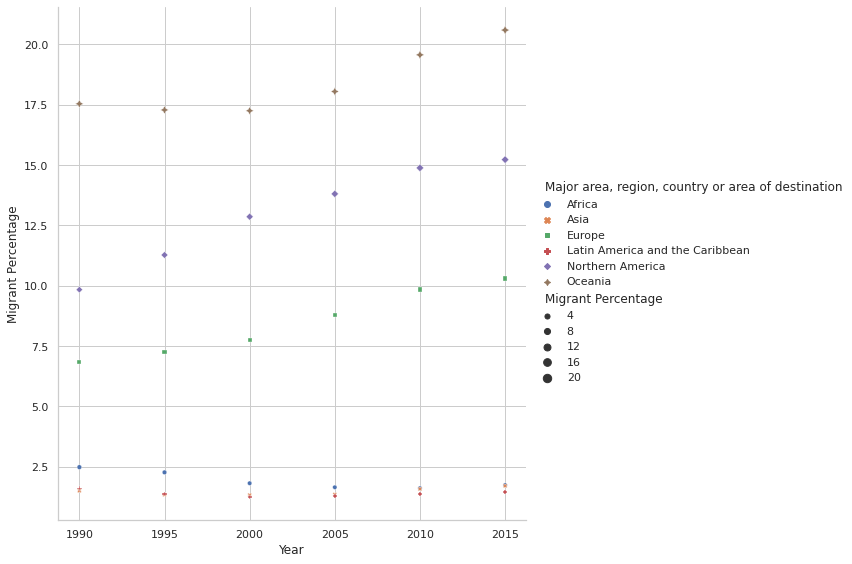

In [62]:
sns.relplot(
    x='Year',
    y='Migrant Percentage',
    size='Migrant Percentage',
    style='Major area, region, country or area of destination',
    hue='Major area, region, country or area of destination',
    data=data_plot,
    height=8, aspect=1
)
plt.show()

In [63]:
#Table 4 - Female migrants as a percentage of the international migrant stock by major area, region, country, or area, 1990-2015
for column in tables[3].iloc[:, 5:]:
    tables[3] = tables[3][pd.to_numeric(
        tables[3][column], errors='coerce').notnull()]

tables[3].iloc[:, 5:] = tables[3].iloc[:, 5:].astype('float64')

In [64]:
tables[3]

Sort order Major area, region, country or area of destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
260         261                                              Samoa   NaN   
261         262                                            Tokelau   NaN   
262         263                                              Tonga   NaN   
263         264                                             Tuvalu   NaN   
264         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  \
0             900              NaN   
1             901              NaN   
2             902              NaN   
3             941              NaN   
4             934              NaN   
..            ...              ...   
260           882                B   
261           772                B   
262           776                B   
263           798                C   
264           876                B   

     Female migrants as a percentage of the international migrant stock 1990  \
0                                            49.039150                         
1                                            51.123977                         
2                                            46.592099                         
3                                            47.261155                         
4                                            46.466684                         
..                                                 ...                         
260                                          47.244564                         
261                                          44.444444                         
262                                          48.883545                         
263                                          43.396226                         
264                                          48.216833                         

     Female migrants as a percentage of the international migrant stock 1995  \
0                                            49.168790                         
1                                            51.149024                         
2                                            46.500135                         
3                                            47.571664                         
4                                            46.279022                         
..                                                 ...                         
260                                          47.784406                         
261                                          44.736842                         
262                                          47.525962                         
263                                          43.726236                         
264                                          48.869048                         

     Female migrants as a percentage of the international migrant stock 2000  \
0                                            49.112244                         
1                                            51.113307                         
2                                            46.128444                         
3                                            46.826689                         
4                                            46.009598                         
..                                                 ...                         
260                                          48.299433                         
261                                          45.038168                   

In [65]:
columns_plot = [
    'Major area, region, country or area of destination',
    *[f'Female migrants as a percentage of the international migrant stock {y}' for y in range(1990, 2016, 5)]
]
data_plot = tables[3][~tables[3]['Type of data (a)'].isnull()][columns_plot]
data_plot = data_plot.melt(id_vars=[columns_plot[0]], var_name='Year',
                           value_name='Female Migrant Percentage')
data_plot.Year = data_plot.Year.str.replace(
    r'.*?(\d+)', lambda x: x.group(1), regex=True)
data_plot

Major area, region, country or area of destination  Year  \
0                                               Burundi  1990   
1                                               Comoros  1990   
2                                              Djibouti  1990   
3                                               Eritrea  1990   
4                                              Ethiopia  1990   
...                                                 ...   ...   
1363                                              Samoa  2015   
1364                                            Tokelau  2015   
1365                                              Tonga  2015   
1366                                             Tuvalu  2015   
1367                          Wallis and Futuna Islands  2015   

      Female Migrant Percentage  
0                     50.987061  
1                     52.290646  
2                     47.437838  
3                     47.434166  
4                     47.439047  
...                         ...  
1363                  49.908704  
1364                  52.156057  
1365                  45.437096  
1366                  44.680851  
1367                  49.526150  

[1368 rows x 3 columns]

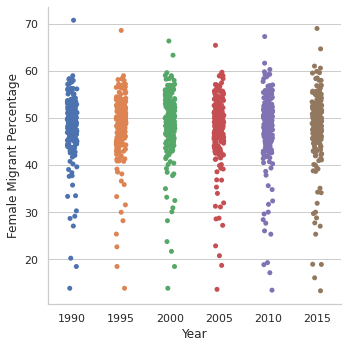

In [66]:
sns.catplot(
    data=data_plot,
    x="Year", y="Female Migrant Percentage"
)
plt.show()

In [67]:
#Table 5 - Annual rate of change of the migrant stock by sex and by major area, region, country, or area, 1990-2015 (percentage)
for column in tables[4].iloc[:, 5:]:
    tables[4] = tables[4][pd.to_numeric(
        tables[4][column], errors='coerce').notnull()]

tables[4].iloc[:, 5:] = tables[4].iloc[:, 5:].astype('float64')

In [68]:
tables[4]

Sort order Major area, region, country or area of destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
260         261                                              Samoa   NaN   
261         262                                            Tokelau   NaN   
262         263                                              Tonga   NaN   
263         264                                             Tuvalu   NaN   
264         265                          Wallis and Futuna Islands   NaN   

     Country code Type of data (a)  \
0             900              NaN   
1             901              NaN   
2             902              NaN   
3             941              NaN   
4             934              NaN   
..            ...              ...   
260           882                B   
261           772                B   
262           776                B   
263           798                C   
264           876                B   

     Annual rate of change of the migrant stock (both sexes) 1990-1995  \
0                                             1.051865                   
1                                             2.275847                   
2                                            -0.487389                   
3                                             1.118175                   
4                                            -0.803244                   
..                                                 ...                   
260                                           6.704748                   
261                                          -0.298513                   
262                                           2.350316                   
263                                          -3.797947                   
264                                           3.617880                   

     Annual rate of change of the migrant stock (both sexes) 1995-2000  \
0                                             1.428058                   
1                                             2.264965                   
2                                             0.241777                   
3                                            -3.001139                   
4                                             0.850177                   
..                                                 ...                   
260                                           4.902820                   
261                                          -0.303036                   
262                                           2.359733                   
263                                          -3.845134                   
264                                           3.636508                   

     Annual rate of change of the migrant stock (both sexes) 2000-2005  \
0                                             2.042124                   
1                                             2.507080                   
2                                             1.328107                   
3                                            -0.539636                   
4                                             1.629340                   
..                                                 ...                   
260                                          -0.858442                   
261                                          -0.307698                   
262                                           3.096969                   
263                                          -3.408224                   
264                                        

In [69]:
columns_plot = [
    'Major area, region, country or area of destination',
    *[f'Annual rate of change of the migrant stock (male) {y}-{y+5}' for y in range(1990, 2011, 5)],
    *[f'Annual rate of change of the migrant stock (female) {y}-{y+5}' for y in range(1990, 2011, 5)],
]
data_plot = tables[4][~tables[4]['Type of data (a)'].isnull()][columns_plot]
data_plot = data_plot.melt(id_vars=[columns_plot[0]], var_name='gender_year',
                           value_name='Rate')
data_plot.gender_year = data_plot.gender_year.str.replace(
    r'.*?(male|female).*?(\d+-\d+)', lambda x: ' '.join([x.group(1), x.group(2)]), regex=True)
data_plot[['Gender', 'Year']] = data_plot.gender_year.str.split(expand=True)
data_plot

Major area, region, country or area of destination       gender_year  \
0                                               Burundi    male 1990-1995   
1                                               Comoros    male 1990-1995   
2                                              Djibouti    male 1990-1995   
3                                               Eritrea    male 1990-1995   
4                                              Ethiopia    male 1990-1995   
...                                                 ...               ...   
2275                                              Samoa  female 2010-2015   
2276                                            Tokelau  female 2010-2015   
2277                                              Tonga  female 2010-2015   
2278                                             Tuvalu  female 2010-2015   
2279                          Wallis and Futuna Islands  female 2010-2015   

          Rate  Gender       Year  
0    -5.475511    male  1990-1995  
1    -0.309060    male  1990-1995  
2    -4.046026    male  1990-1995  
3     0.983754    male  1990-1995  
4    -7.179744    male  1990-1995  
...        ...     ...        ...  
2275 -0.545343  female  2010-2015  
2276  2.603250  female  2010-2015  
2277  2.526318  female  2010-2015  
2278 -1.819436  female  2010-2015  
2279  0.516899  female  2010-2015  

[2280 rows x 5 columns]

In [70]:
df5=data_plot
df5.drop(['gender_year'], axis=1)

Major area, region, country or area of destination      Rate  Gender  \
0                                               Burundi -5.475511    male   
1                                               Comoros -0.309060    male   
2                                              Djibouti -4.046026    male   
3                                               Eritrea  0.983754    male   
4                                              Ethiopia -7.179744    male   
...                                                 ...       ...     ...   
2275                                              Samoa -0.545343  female   
2276                                            Tokelau  2.603250  female   
2277                                              Tonga  2.526318  female   
2278                                             Tuvalu -1.819436  female   
2279                          Wallis and Futuna Islands  0.516899  female   

           Year  
0     1990-1995  
1     1990-1995  
2     1990-1995  
3     1990-1995  
4     1990-1995  
...         ...  
2275  2010-2015  
2276  2010-2015  
2277  2010-2015  
2278  2010-2015  
2279  2010-2015  

[2280 rows x 4 columns]

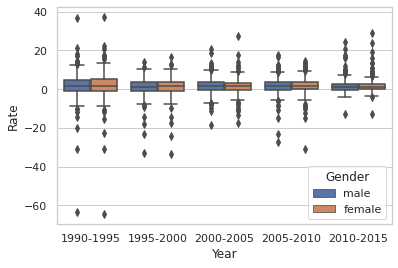

In [71]:
sns.boxplot(
    x='Year', y='Rate',
    hue="Gender",
    data=data_plot,
)
plt.show()

In [72]:
#Table 6 - Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015
tables[5].iloc[:, 5:10]

Estimated refugee stock at mid-year (both sexes) 1990  \
0                                             18836571      
1                                              2014564      
2                                             16822007      
3                                              5048391      
4                                             11773616      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    Estimated refugee stock at mid-year (both sexes) 1995  \
0                                             17853840      
1                                              3609670      
2                                             14244170      
3                                              5160131      
4                                              9084039      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    Estimated refugee stock at mid-year (both sexes) 2000  \
0                                             15827803      
1                                              2997256      
2                                             12830547      
3                                              3047488      
4                                              9783059      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    Estimated refugee stock at mid-year (both sexes) 2005  \
0                                             13276733      
1                                              2361229      
2                                             10915504      
3                                              2363782      
4                                              8551722      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

     Estimated refugee stock at mid-year (both sexes) 2010  
0                                             15370755      
1                                              2046917      
2                                             13323838      
3                                              1957884      
4                                             11365954      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

[265 rows x 5 columns]

In [73]:
for column in tables[5].iloc[:, 5:11]:
    tables[5] = tables[5][pd.to_numeric(
        tables[5][column], errors='coerce').notnull()]

tables[5].iloc[:, 5:11] = tables[5].iloc[:, 5:11].astype('int64')

for column in tables[5].iloc[:, 11:]:
    tables[5] = tables[5][pd.to_numeric(
        tables[5][column], errors='coerce').notnull()]

tables[5].iloc[:, 11:] = tables[5].iloc[:, 11:].astype('float64')

In [74]:
tables[5]

Sort order Major area, region, country or area of destination Notes  \
0             1                                              WORLD   NaN   
1             2                                  Developed regions   (b)   
2             3                                 Developing regions   (c)   
3             4                          Least developed countries   (d)   
4             5  Less developed regions excluding least develop...   NaN   
..          ...                                                ...   ...   
238         239                          Australia and New Zealand   NaN   
239         240                                          Australia  (22)   
240         241                                        New Zealand   NaN   
241         242                                          Melanesia   NaN   
244         245                                   Papua New Guinea   NaN   

     Country code Type of data (a)  \
0             900              NaN   
1             901              NaN   
2             902              NaN   
3             941              NaN   
4             934              NaN   
..            ...              ...   
238           927              NaN   
239            36                B   
240           554                B   
241           928              NaN   
244           598              C R   

     Estimated refugee stock at mid-year (both sexes) 1990  \
0                                             18836571       
1                                              2014564       
2                                             16822007       
3                                              5048391       
4                                             11773616       
..                                                 ...       
238                                             102581       
239                                              97915       
240                                               4666       
241                                               7099       
244                                               7099       

     Estimated refugee stock at mid-year (both sexes) 1995  \
0                                             17853840       
1                                              3609670       
2                                             14244170       
3                                              5160131       
4                                              9084039       
..                                                 ...       
238                                              82839       
239                                              79081       
240                                               3758       
241                                               9601       
244                                               9601       

     Estimated refugee stock at mid-year (both sexes) 2000  \
0                                             15827803       
1                                              2997256       
2                                             12830547       
3                                              3047488       
4                                              9783059       
..                                                 ...       
238                                              76169       
239                                              71246       
240                                               4923       
241                                               5863       
244                                               5863       

     Estimated refugee stock at mid-year (both sexes) 2005  \
0                                             13276733       
1                                              2361229       
2                                             10915504       
3                                              2363782       
4                                              8551722       
..                          

In [75]:
tables[5].iloc[:, 5:10]

Estimated refugee stock at mid-year (both sexes) 1990  \
0                                             18836571       
1                                              2014564       
2                                             16822007       
3                                              5048391       
4                                             11773616       
..                                                 ...       
238                                             102581       
239                                              97915       
240                                               4666       
241                                               7099       
244                                               7099       

     Estimated refugee stock at mid-year (both sexes) 1995  \
0                                             17853840       
1                                              3609670       
2                                             14244170       
3                                              5160131       
4                                              9084039       
..                                                 ...       
238                                              82839       
239                                              79081       
240                                               3758       
241                                               9601       
244                                               9601       

     Estimated refugee stock at mid-year (both sexes) 2000  \
0                                             15827803       
1                                              2997256       
2                                             12830547       
3                                              3047488       
4                                              9783059       
..                                                 ...       
238                                              76169       
239                                              71246       
240                                               4923       
241                                               5863       
244                                               5863       

     Estimated refugee stock at mid-year (both sexes) 2005  \
0                                             13276733       
1                                              2361229       
2                                             10915504       
3                                              2363782       
4                                              8551722       
..                                                 ...       
238                                              72029       
239                                              66722       
240                                               5307       
241                                              10000       
244                                               9999       

     Estimated refugee stock at mid-year (both sexes) 2010  
0                                             15370755      
1                                              2046917      
2                                             13323838      
3                                              1957884      
4                                             11365954      
..                                                 ...      
238                                              27812      
239                                              25505      
240                                               2307      
241                                               4703      
244                                               4698      

[143 rows x 5 columns]

In [76]:
# Estimated refugee stock at mid-year (both sexes)
columns_plot_refugee = [
    'Major area, region, country or area of destination',
    *[f'Estimated refugee stock at mid-year (both sexes) {y}' for y in range(1990, 2016, 5)],
]
data_plot_refugee = tables[5][~tables[5]
                              ['Type of data (a)'].isnull()][columns_plot_refugee]
data_plot_refugee = data_plot_refugee.melt(id_vars=[columns_plot_refugee[0]], var_name='year',
                                           value_name='refugee')
data_plot_refugee.year = data_plot_refugee.year.str.replace(
    'Estimated refugee stock at mid-year (both sexes) ', '', regex=False)

# Refugees as a percentage of the international migrant stock
columns_plot_percentage = [
    'Major area, region, country or area of destination',
    *[f'Refugees as a percentage of the international migrant stock {y}' for y in range(1990, 2016, 5)],
]
data_plot_percentage = tables[5][~tables[5]
                                 ['Type of data (a)'].isnull()][columns_plot_percentage]
data_plot_percentage = data_plot_percentage.melt(id_vars=[columns_plot_percentage[0]], var_name='year',
                                                 value_name='percentage')
data_plot_percentage.year = data_plot_percentage.year.str.replace(
    'Refugees as a percentage of the international migrant stock ', '', regex=False)

# Merge
data_plot = pd.merge(
    data_plot_refugee, data_plot_percentage, how='inner',
    on=['Major area, region, country or area of destination', 'year'],
)

#     *[f'Refugees as a percentage of the international migrant stock {y}' for y in range(1990, 2016, 5)],
# data_plot.gender_year = data_plot.gender_year.str.replace(
#     r'.*?(male|female).*?(\d+-\d+)', lambda x: ' '.join([x.group(1), x.group(2)]), regex=True)
# data_plot[['Gender', 'Year']] = data_plot.gender_year.str.split(expand=True)
data_plot

Major area, region, country or area of destination  year  refugee  \
0                                              Burundi  1990   267929   
1                                             Djibouti  1990    54508   
2                                             Ethiopia  1990   741965   
3                                                Kenya  1990    13452   
4                                               Malawi  1990   874614   
..                                                 ...   ...      ...   
667                                             Canada  2015   160279   
668                           United States of America  2015   263662   
669                                          Australia  2015    48005   
670                                        New Zealand  2015     1403   
671                                   Papua New Guinea  2015     4797   

     percentage  
0     80.432590  
1     44.597901  
2     64.217710  
3      4.524844  
4     77.555679  
..          ...  
667    2.045549  
668    0.565469  
669    0.709749  
670    0.134938  
671   18.606004  

[672 rows x 4 columns]

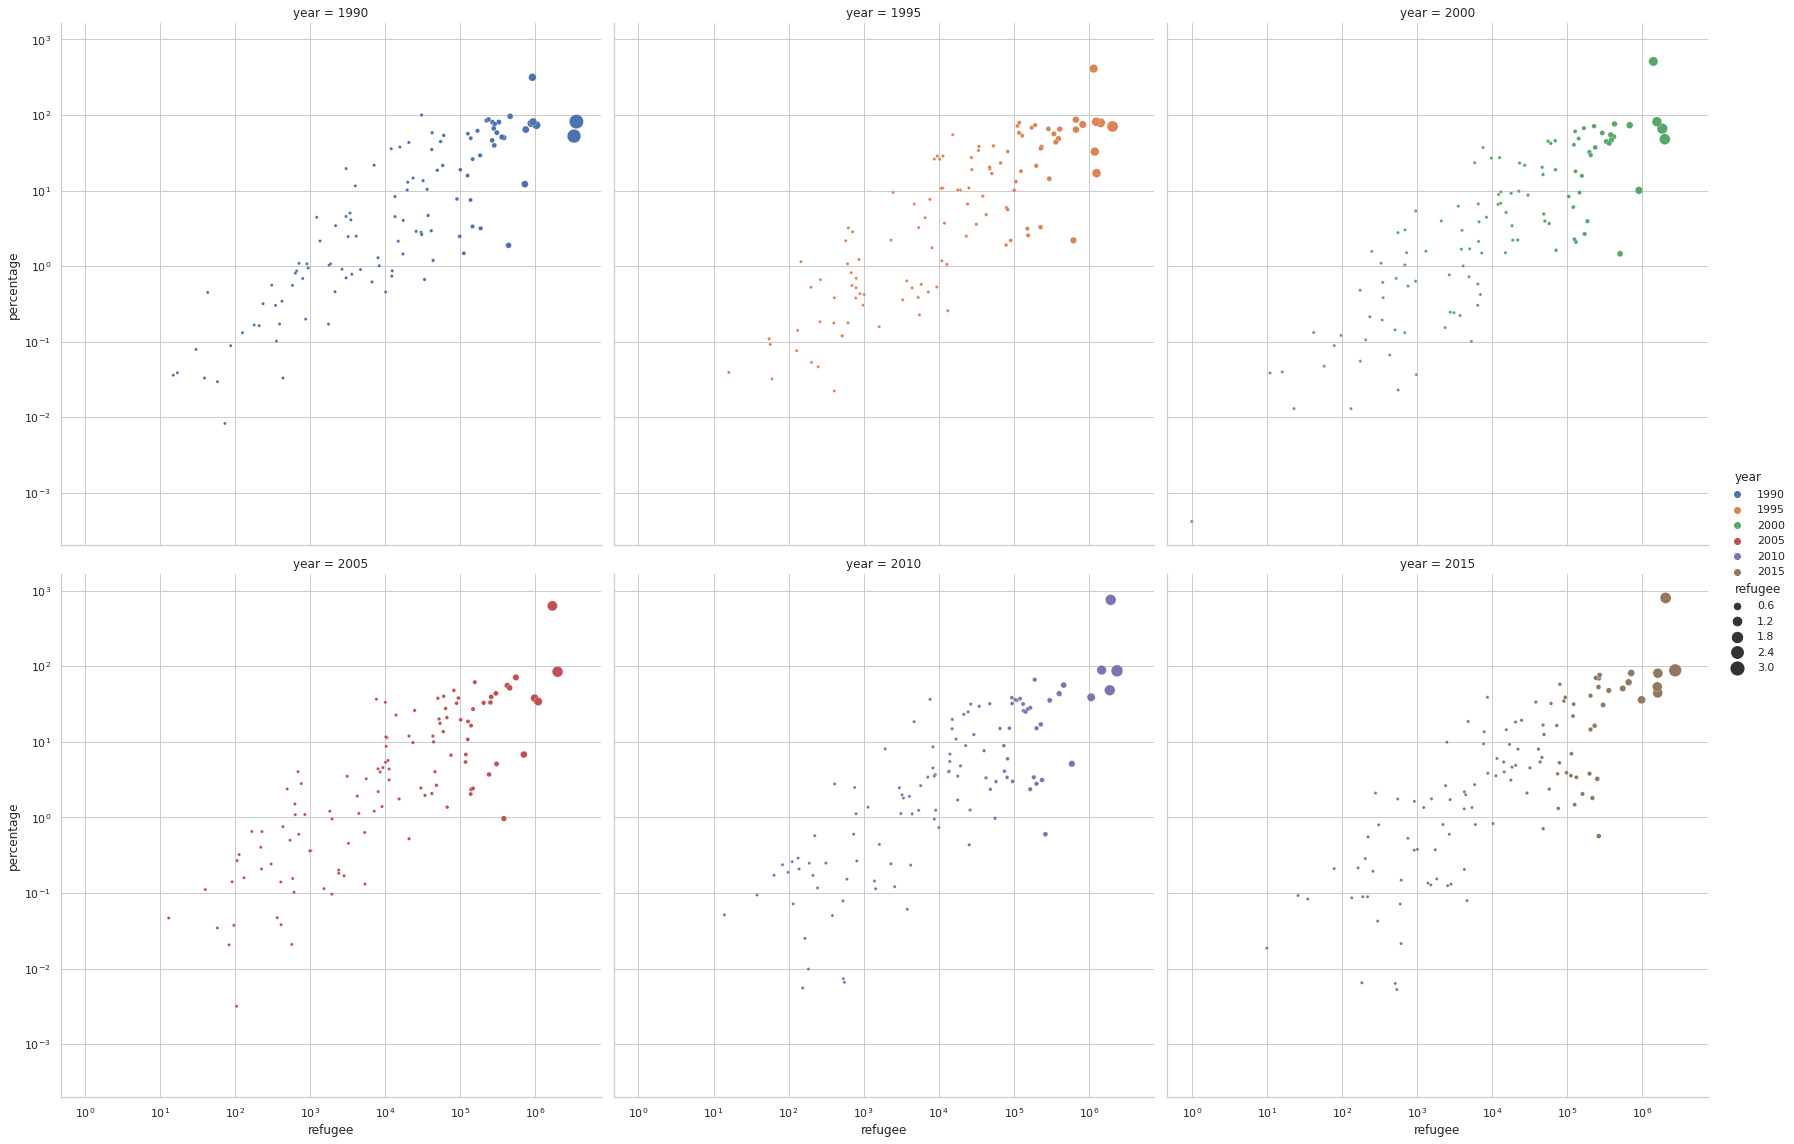

In [77]:
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=data_plot,
    x="refugee", y="percentage",
    hue="year", size="refugee",
    sizes=(10, 200),
    col="year",
    col_wrap=3,
    height=8
)
g.set(xscale="log", yscale="log")
plt.show()